In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sqlite
from sqlalchemy import create_engine


Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [4]:
df_foursquare = pd.read_csv('foursquare_data.csv')
df_yelp = pd.read_csv('yeld_data.csv')

# Will only be getting first 10 rows from foursquare because i only have 10 from yelp

In [21]:
merged_df = pd.merge(df_foursquare, df_yelp, on=['latitude', 'longitude'])
merged_df.rename(columns={'Number of Parks found_x': 'Number of Parks found (FourSquare)', 'Distance to Closest Park_x': 'Distance to Closest Park (FourSquare)', 'Number of Parks found_y': 'Number of Parks found (Yelp)', 'Distance to Closest Park_y': 'Distance to Closest Park (Yelp)'}, inplace=True)
merged_df

,latitude,longitude,Number of Parks found (FourSquare),Distance to Closest Park (FourSquare),Number of Parks found (Yelp),Distance to Closest Park (Yelp)
0,43.665269,-79.319796,5,63.0,3,73.308008
1,43.671420,-79.445947,6,61.0,1,500.794541
2,43.666224,-79.317693,10,138.0,5,258.478643
3,43.653236,-79.376716,9,214.0,4,340.683204
4,43.663722,-79.380288,10,163.0,12,198.441814
5,43.657763,-79.389165,2,307.0,5,288.293606
6,43.656729,-79.382736,8,270.0,6,264.774708
7,43.664467,-79.414783,6,253.0,3,50.869729
8,43.675492,-79.388858,7,48.0,5,60.405338
9,43.674991,-79.396273,8,164.0,2,11936.443958


In [63]:
merged_df.to_csv('merged_df.csv', index=False)

## DATA AUDIT

In [44]:
df_foursquare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  751 non-null    float64
 1   longitude                 751 non-null    float64
 2   Number of Parks found     751 non-null    int64  
 3   Distance to Closest Park  706 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 23.6 KB


In [46]:
df_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  10 non-null     float64
 1   longitude                 10 non-null     float64
 2   Number of Parks found     10 non-null     int64  
 3   Distance to Closest Park  10 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 452.0 bytes


In [48]:
df_foursquare.isnull().sum()

latitude                     0
longitude                    0
Number of Parks found        0
Distance to Closest Park    45
dtype: int64

In [76]:
df_yelp.isnull().sum()

latitude                    0
longitude                   0
Number of Parks found       0
Distance to Closest Park    0
dtype: int64

For Distance to Closest Park categories, I purposely  made the value null instead of 0 when there are no parks within the radius, this is to not effect any computational or graphical applications. 

### Data Cleaning

I'm dropping the last row as it seems to be a huge outlier, potentially a glitch because the max distance should be 500 as observed with all other rows. This will need to be looked at further, it will not be in the regression model either as it could skew the results.

The row names were also changed:
merged_df.rename(columns={'Number of Parks found_x': 'Number of Parks found (FourSquare)', 'Distance to Closest Park_x': 'Distance to Closest Park (FourSquare)', 'Number of Parks found_y': 'Number of Parks found (Yelp)', 'Distance to Closest Park_y': 'Distance to Closest Park (Yelp)'}, inplace=True)

I also filtered all the results from the FourSquare and Yelp APIs to only use the distance and filter out the rest. 

In [43]:
merged_df

,latitude,longitude,Number of Parks found (FourSquare),Distance to Closest Park (FourSquare),Number of Parks found (Yelp),Distance to Closest Park (Yelp)
0,43.665269,-79.319796,5,63.0,3,73.308008
1,43.671420,-79.445947,6,61.0,1,500.794541
2,43.666224,-79.317693,10,138.0,5,258.478643
3,43.653236,-79.376716,9,214.0,4,340.683204
4,43.663722,-79.380288,10,163.0,12,198.441814
5,43.657763,-79.389165,2,307.0,5,288.293606
6,43.656729,-79.382736,8,270.0,6,264.774708
7,43.664467,-79.414783,6,253.0,3,50.869729
8,43.675492,-79.388858,7,48.0,5,60.405338


## Data Visualization for EDA

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

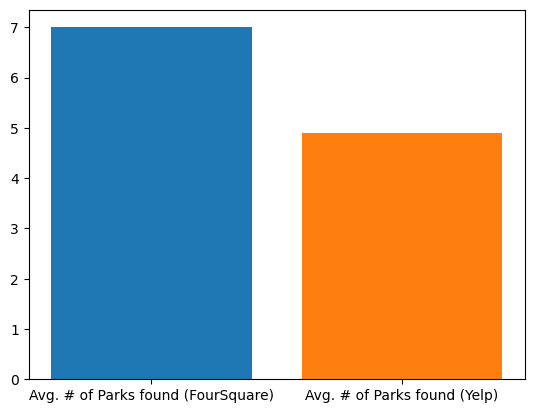

In [64]:
x = 'Avg. # of Parks found (FourSquare)'
x2 = 'Avg. # of Parks found (Yelp)'
plt.bar(x, merged_df['Number of Parks found (FourSquare)'].mean())
plt.bar(x2, merged_df['Number of Parks found (Yelp)'].mean())


plt.show()

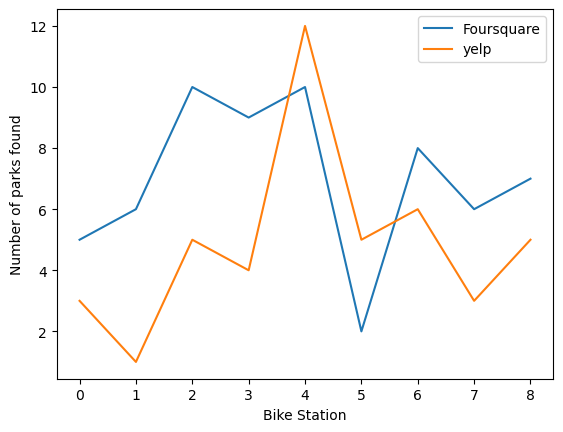

In [54]:
x = merged_df. index 
y = merged_df['Number of Parks found (FourSquare)']
y2 = merged_df['Number of Parks found (Yelp)']
plt.plot(x, y, label = 'Foursquare')
plt.plot(x, y2, label = 'yelp')
plt.xlabel('Bike Station')
plt.ylabel('Number of parks found')

plt.legend()


In [35]:
df_fsq = pd.read_csv('foursquare_data.csv')


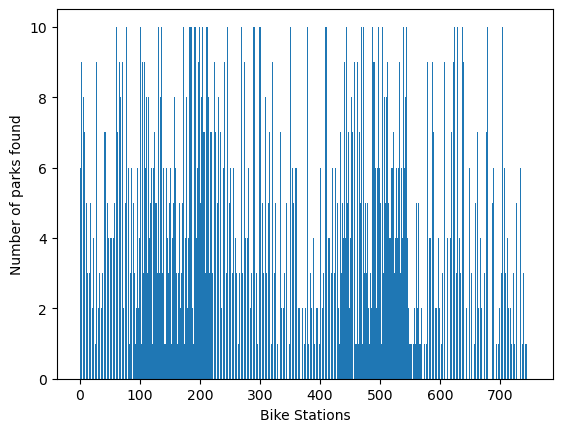

In [53]:
x = df_fsq.index

plt.bar(x, df_fsq['Number of Parks found'])
plt.xlabel('Bike Stations')
plt.ylabel('Number of parks found')
plt.show()

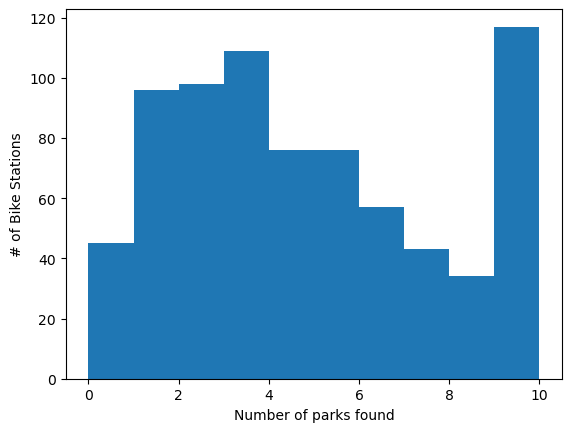

In [56]:
x = df_fsq.index

plt.hist(df_fsq['Number of Parks found'])
plt.xlabel('Number of parks found')
plt.ylabel('# of Bike Stations')
plt.show()

In [ ]:
# There's somewhat of a left skew, it should be noted that the numbers of parks found per bike station never exceeds 10 parks. 

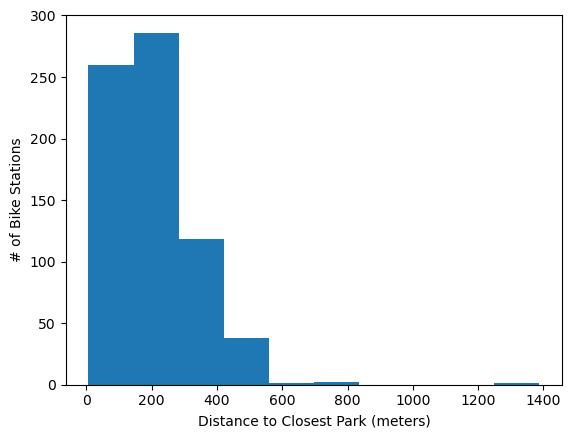

In [57]:
plt.hist(df_fsq['Distance to Closest Park'])
plt.xlabel('Distance to Closest Park (meters)')
plt.ylabel('# of Bike Stations')
plt.show()

In [ ]:
# Its right skewed, should be noted that there's a few bike stations that are futher than 500 meters, this is suprising as the radius limit that was put on the API was 500m. So these would be seen as outliters and be taken out, especially the one near 1400m. 

Text(0, 0.5, 'Distance to Closest Park (meters)')

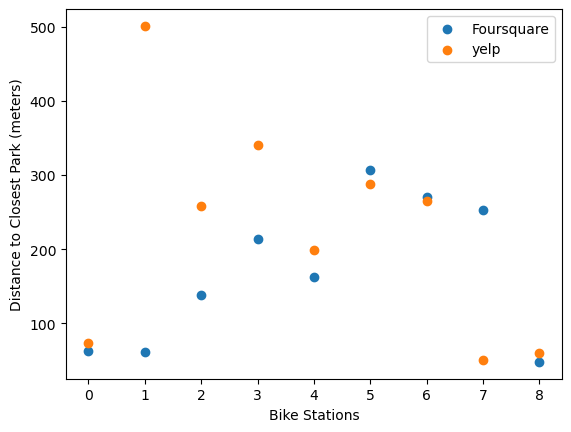

In [73]:
x = merged_df.index
y3 = merged_df['Distance to Closest Park (FourSquare)']
y4 = merged_df['Distance to Closest Park (Yelp)']

plt.scatter(x, y3, label = 'Foursquare')
plt.scatter(x, y4, label = 'yelp')
plt.legend()
plt.xlabel('Bike Stations')
plt.ylabel('Distance to Closest Park (meters)')


In a perfect and equal world, the orange and blue dots should be overlapping at every point along the x-axis, the dote lower in y value is the more correct one as it would be the closer one to out bike station, it should be noted that at x values:(0,4,5,6,8) the dotes are close meaning they retrieved the same park, 5 out of 9 dots stations, (not too bad). Some dots are very extremly far from each other like x value:1, this would be further investigated. 

## EDA

In [41]:
df_yelp.describe()

,latitude,longitude,Number of Parks found,Distance to Closest Park
count,10.000000,10.000000,10.000000,10.000000
mean,43.664931,-79.381225,4.600000,1397.249355
std,0.007555,0.038724,3.025815,3705.754036
min,43.653236,-79.445947,1.000000,50.869729
25%,43.659253,-79.394496,3.000000,104.591460
50%,43.664868,-79.385797,4.500000,261.626676
75%,43.670121,-79.377609,5.000000,327.585804
max,43.675492,-79.317693,12.000000,11936.443958


In [ ]:
# The max is too high, it should be 500 (clearly outlier)

In [40]:
df_foursquare.describe()

,latitude,longitude,Number of Parks found,Distance to Closest Park
count,751.000000,751.000000,751.000000,706.000000
mean,43.670230,-79.395821,4.458056,202.288952
std,0.032727,0.064244,3.040708,128.613430
min,43.588077,-79.550404,0.000000,6.000000
25%,43.649202,-79.433942,2.000000,111.250000
50%,43.662857,-79.395043,4.000000,185.000000
75%,43.684141,-79.367040,7.000000,273.000000
max,43.788319,-79.123505,10.000000,1388.000000


In [ ]:
# The max is too high, it should be 500 (clearly outlier)

In [50]:
df_foursquare['Number of Parks found'].value_counts()

Number of Parks found
3     109
2      98
1      96
10     77
5      76
4      76
6      57
0      45
7      43
9      40
8      34
Name: count, dtype: int64

In [75]:
df_yelp['Number of Parks found'].value_counts()

Number of Parks found
5     3
3     2
1     1
4     1
12    1
6     1
2     1
Name: count, dtype: int64

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [51]:
conn = sqlite.connect('stats_project.db')
merged_df.to_sql('mergered_foursquare_yelp', conn, index=False, if_exists='replace')


10

In [52]:
engine = create_engine('sqlite:///data/stats_project.db')


In [58]:
query = 'SELECT * FROM mergered_foursquare_yelp'
result_df = pd.read_sql_query(query, conn)

print(result_df.to_string(index=False))


 latitude  longitude  Number of Parks found (FourSquare)  Distance to Closest Park (FourSquare)  Number of Parks found (Yelp)  Distance to Closest Park (Yelp)
43.665269 -79.319796                                   5                                   63.0                             3                        73.308008
43.671420 -79.445947                                   6                                   61.0                             1                       500.794541
43.666224 -79.317693                                  10                                  138.0                             5                       258.478643
43.653236 -79.376716                                   9                                  214.0                             4                       340.683204
43.663722 -79.380288                                  10                                  163.0                            12                       198.441814
43.657763 -79.389165                          

Look at the data before and after the join to validate your data.

In [ ]:
# The data resembles what was seen in the merged_df dataframe that was created